In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import matplotlib
import sklearn
print("package版本信息：")
print("numpy:      ", np.__version__)
print("pandas:     ", pd.__version__)
print("matplotlib: ", matplotlib.__version__)
print("sklearn:    ", sklearn.__version__)
print("seaborn:    ", sns.__version__)

package版本信息：
numpy:       1.21.2
pandas:      1.3.3
matplotlib:  3.4.3
sklearn:     0.24.2
seaborn:     0.11.2


In [2]:
# TAB自动补全
# %config Completer.use_jedi = False

# 可选的package
# import plotly
# print("plotly:     ", plotly.__version__)
# import plotly.express as px
# from plotly import graph_objects as go

# Sklearn中的决策树

整体介绍可以参考官方文档 [Decision Trees](https://scikit-learn.org/stable/modules/tree.html#tree).

## 分类树

官方文档 [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

`DecisionTreeClassifier()`

+ 重要的实例化参数：
  + criterion：{“gini”, “entropy”}, default=”gini”
  + max_depth
  + min_samples_split：int or float, default=2
  + min_samples_leaf：int or float, default=1
  + min_weight_fraction_leaf：float, default=0.0
  + max_features：int, float or {“auto”, “sqrt”, “log2”}, default=None
  + random_state：int
  + min_impurity_decrease：float, default=0.0
  + ccp_alpha：non-negative float, default=0.0


  
+ 常用属性：
  + classes_
  + n_classes_
  + max_features_：int
  + n_outputs_：int
  + feature_importances_：属性重要性度量
  + tree_：它是一个`sklearn.tree._tree.Tree`的实例类，里面存储了许多有关底层构建的二叉树的内容


  
+ 常用方法：
  + `fit(X, y)`
  + `score(X, Y)`
  + `predict(X)`
  + `predict_prob(X)`
  + `predcit_log_prob(X)`
  + `apply(X)`：给出`X`中每个样本最后所归属的叶子节点编号
  + `decision_path(X)`：给出`X`中每个样本的判定路径
  

有关`sklearn.tree._tree.Tree`类，可以参考官方文档 [Understanding the decision tree structure](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py).   
可以通过如下语句查看该类的帮助文档：
```python
from sklearn.tree._tree import Tree
help(Tree)
```
总结说来，该类对象存储了决策树对应的二叉树结构，它是以数组的形式存放各种信息的，有如下属性
+ node_count：整个数的节点个数（内部节点+叶子节点）
+ capacity：存储数的array容量，至少等于node_count
+ max_depth：
+ max_n_classess：类别数量
+ n_features:
+ n_leaves：

存储二叉树的数组信息如下：
+ children_left : array of int, shape=(node_count,)，存储每个节点的左子节点 
  + 对于叶子节点，children_left[i] == TREE_LEAF，通常为-1
  + 对于内部节点有，children_left[i] > i，并且分割规则为 X[:, feature[i]] <= threshold[i].
+ children_right : array of int, shape=(node_count,)，存储每个节点的右子节点
  + 对于叶子节点，children_left[i] == TREE_LEAF，通常为-1
  + 对于内部节点有，children_left[i] > i，并且分割规则为 X[:, feature[i]] > threshold[i].
+ feature : array of int, shape=(node_count,)，每个**内部**节点选择的分割特征的下标
+ threshold : array of double, shape=(node_count,)，每个**内部**节点所选择的分割特征的分割值
+ value : array of double, shape=(node_count, n_outputs, max_n_classes)，每个节点的预测值，单个节点shape=(n_outputs, max_n_clases)
+ impurity : array of double, shape=(node_count,)，每个节点的不纯度
+ n_node_samples : array of int, shape=(node_count,)，每个节点的样本数量
+ weighted_n_node_samples : array of int, shape=(node_count,)

In [1]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_iris
X_train, y_train = load_iris(return_X_y=True, as_frame=True)

In [2]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=29)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=29)

In [4]:
print(tree_clf.n_classes_)
print(tree_clf.classes_)
print(tree_clf.max_features_)
print(tree_clf.n_features_)
print(tree_clf.n_features_in_)
print(tree_clf.n_outputs_)

3
[0 1 2]
4
4
4
1


In [6]:
tree_clf.score(X_train, y_train)

0.9733333333333334

In [11]:
# 每个样本的决策路径
samples_path = np.array(tree_clf.decision_path(X_train).todense())
samples_path

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 1, 0, 1],
       [1, 0, 1, ..., 1, 0, 1],
       [1, 0, 1, ..., 1, 0, 1]], dtype=int64)

In [13]:
# 每个样本最终到达的叶子节点
samples_leaf_idx = tree_clf.apply(X_train)
samples_leaf_idx

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 4, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 8, 7, 8, 8, 5, 8, 8,
       8, 5, 5, 8, 8, 8, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64)

In [15]:
tree_Tree = tree_clf.tree_
tree_Tree

In [16]:
tree_Tree.children_left

array([ 1, -1,  3,  4, -1, -1,  7, -1, -1], dtype=int64)

In [17]:
tree_Tree.children_right

array([ 2, -1,  6,  5, -1, -1,  8, -1, -1], dtype=int64)

In [18]:
tree_Tree.feature

array([ 3, -2,  3,  2, -2, -2,  2, -2, -2], dtype=int64)

In [20]:
tree_Tree.threshold

array([ 0.80000001, -2.        ,  1.75      ,  4.95000005, -2.        ,
       -2.        ,  4.85000014, -2.        , -2.        ])

In [19]:
tree_Tree.value

array([[[50., 50., 50.]],

       [[50.,  0.,  0.]],

       [[ 0., 50., 50.]],

       [[ 0., 49.,  5.]],

       [[ 0., 47.,  1.]],

       [[ 0.,  2.,  4.]],

       [[ 0.,  1., 45.]],

       [[ 0.,  1.,  2.]],

       [[ 0.,  0., 43.]]])

## 回归树

官方文档 [sklearn.tree.DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor).

`DecisionTreeRegressor()`

## 绘制决策树

参考官方文档 [Decision Trees](https://scikit-learn.org/stable/modules/tree.html#tree).

有两种绘制方式：
1. 使用`sklearn.tree`里自带的`plot_tree`函数
2. 使用`graphviz`模块绘制

In [12]:
import graphviz

In [13]:
tree_dot = export_graphviz(clf)

In [17]:
graph = graphviz.Source(tree_dot)

In [18]:
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

[Text(189.42631578947368, 199.32, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(114.53684210526316, 163.07999999999998, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(70.48421052631579, 126.83999999999999, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(35.242105263157896, 90.6, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(17.621052631578948, 54.359999999999985, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(52.863157894736844, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(105.72631578947369, 90.6, 'X[1] <= 2.395\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(88.10526315789474, 54.359999999999985, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(123.34736842105264, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(158.58947368421053, 126.83999999999999, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 6

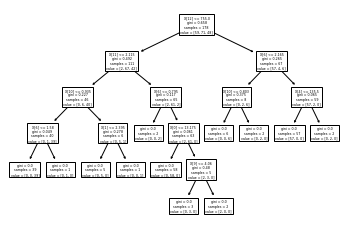

In [16]:
plot_tree(clf)

探索决策树

In [ ]:
clf.feature_importances_

-----

# 孤立森林

`sklearn.ensemble.IsolationForest`，用于异常值检测.

`IsolationForest(*, n_estimators=100, max_samples='auto', contamination='auto', max_features=1.0, bootstrap=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)`

+ 实例化参数
  + `n_estimators`，用于计算的树的个数
  + `max_samples`，每棵树中，用于构建的最大样本数，有如下取值：
    + int, 指定使用的最大样本数
    + float, 指定使用的比例
    + `"auto"`, 那么取值为 $min(256, n\_samples)$
  
  其他的不重要.


+ 属性
  + `base_estimator_`, 
  + `estimators_`, 拟合的所有的树的列表
  + `max_samples_`, 使用的最大样本数
  + `n_features_`, 


+ 方法
  + `decision_function(X)`, 计算每个样本在所有base estimator中的 anomaly score 的均值.  
  返回值是一个 `shape=(n_samples,)` 的ndarray.
  + `fit_predict(X)`, `predict(X)`, 判断样本是否为异常点.  
  返回值为 `shape=(n_samples,)`，1 表示正常， -1 表示异常值.
  + `score_samples(X)`, 计算每个样本的 anomaly score 的负值？？？？？   
  返回值为 ndarray of `shape=(n_samples,)`.
  

下面的例子来源于sklearn官方文档 [IsolationForest Sample](https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py).

In [2]:
from sklearn.ensemble import IsolationForest

In [3]:
rng = np.random.RandomState(42)

X = 0.5*rng.randn(100, 2)

# 产生两个中心点，一个往左下方移动 2, 一个往右上方移动 2
X = pd.DataFrame(np.vstack([X-2, X+2]), columns=['x', 'y'])

# 产生一些异常点，从 [-4, 4]的区间的均匀分布产生
X_outliers = pd.DataFrame(rng.uniform(low=-4, high=4, size=(20, 2)),  columns=['x', 'y'])

In [18]:
ifrest = IsolationForest(n_estimators=20, max_samples=100)

X_all = pd.concat([X, X_outliers], axis=0)
ifrest.fit(X_all)
y_pred = ifrest.predict(X_all)

In [19]:
ifrest.estimators_samples_[0]

array([ 21,  28, 188, 204,  11, 160,  72,  76, 106, 150, 185,  93,  56,
        31, 141, 156,  14, 147, 171,  96, 127,  77, 173,  51,  10, 201,
         9, 219,  69, 199,  78,  13, 153, 133, 176,  55, 132,  41,  91,
       118, 208,  33, 158, 100, 125, 108,  32, 197, 192,  20, 113, 103,
        37,  94,  67, 144,  17, 124, 206, 128, 216,  61,  70, 196,  47,
        60,  87, 194, 203,  49,  63,  83,  34, 187, 149,  22, 121,  36,
       212, 122, 175, 168, 112,  97,  19,   4, 105, 174, 110,  89, 191,
       207, 190,  73,  27, 186, 178, 193,  90,   3])

In [20]:
y_pred[:10]

array([ 1,  1,  1,  1,  1,  1, -1, -1,  1, -1])

In [21]:
outliers_pred = X_all[y_pred == -1]

In [23]:
outliers_pred.shape

(60, 2)

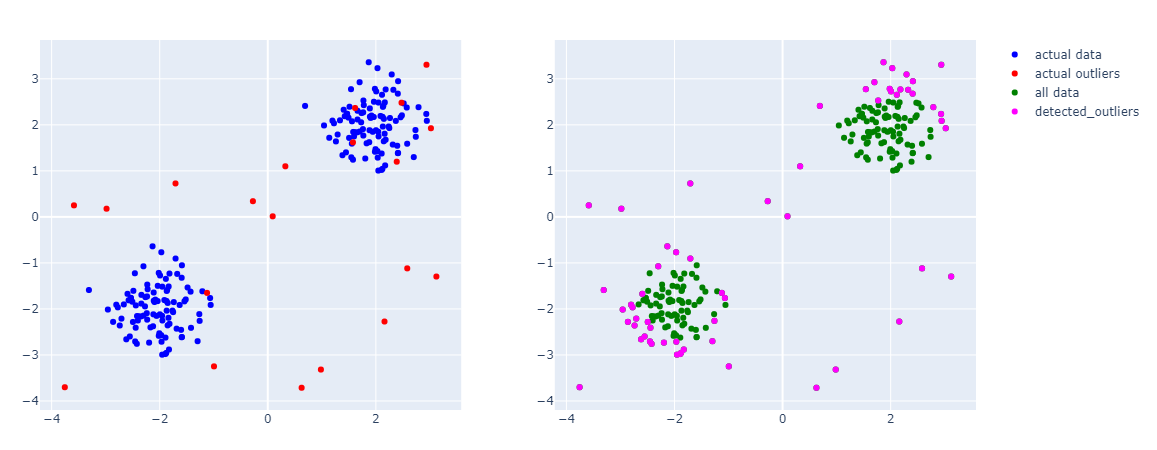

In [42]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, row_heights=[400], column_widths=[500, 500])

subfig = px.scatter(X, x='x', y='y', color_discrete_sequence=['blue'])
subfig.data[0].name="actual data"
subfig.data[0].showlegend=True
fig.add_trace(subfig.data[0], row=1, col=1)
# subfig.data[0].showlegend=False
# fig.add_trace(subfig.data[0], row=1, col=2)

fig.add_trace(
    go.Scatter(x=X_outliers['x'], y=X_outliers['y'], mode='markers',
               marker=dict(color='red')
               , name="actual outliers"
              ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=X_all['x'], y=X_all['y'], mode='markers',
               marker=dict(color='green'),
               name="all data"
              ),
    row=1, col=2
)


fig.add_trace(
    go.Scatter(x=outliers_pred['x'], y=outliers_pred['y'], mode='markers',
              marker=dict(color='magenta'),
               name="detected_outliers"
              ),
    row=1, col=2
)

fig.update_layout(margin=dict(l=40, r=40, t=40, b=40))

fig.show()